In [91]:
import requests
import time
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta
import pytz
ti = int(time.time())
a = str(ti)
headers = {
  'Accept': 'application/json'
}

r = requests.get('https://api.delta.exchange/v2/history/candles', params={
  'resolution': '3m',  
  'symbol': 'BTCUSD',  
  'start': str(int(time.time()-int(24*60*60))),  
  'end': str(int(time.time()))
}, headers = headers)


In [92]:
data = r.json()
def convert_to_ist(unix_timestamp):
    current_time = datetime.fromtimestamp(unix_timestamp, tz = timezone.utc)
    ist_time = current_time + timedelta(hours= 5, minutes=30)
    return ist_time.strftime('%Y-%m-%d %H:%M:%S')


for result in data['result']:
    result['time'] = convert_to_ist(result['time'])
data

{'result': [{'close': 60734.5,
   'high': 60734.5,
   'low': 60734.5,
   'open': 60734.5,
   'time': '2024-10-03 00:39:00',
   'volume': 1875},
  {'close': 60793.5,
   'high': 60814.5,
   'low': 60558.5,
   'open': 60696,
   'time': '2024-10-03 00:36:00',
   'volume': 15603},
  {'close': 60737,
   'high': 60892,
   'low': 60737,
   'open': 60892,
   'time': '2024-10-03 00:33:00',
   'volume': 10857},
  {'close': 60854.5,
   'high': 60894,
   'low': 60718,
   'open': 60718,
   'time': '2024-10-03 00:30:00',
   'volume': 11395},
  {'close': 60802,
   'high': 60939,
   'low': 60773,
   'open': 60939,
   'time': '2024-10-03 00:27:00',
   'volume': 13156},
  {'close': 60938,
   'high': 60959.5,
   'low': 60889,
   'open': 60959.5,
   'time': '2024-10-03 00:24:00',
   'volume': 9490},
  {'close': 60903.5,
   'high': 60963.5,
   'low': 60856.5,
   'open': 60963.5,
   'time': '2024-10-03 00:21:00',
   'volume': 19686},
  {'close': 61002,
   'high': 61025,
   'low': 60981,
   'open': 61025,
   

In [93]:

btc_df = pd.DataFrame(data['result'])
print(btc_df)

       close     high      low     open                 time  volume
0    60734.5  60734.5  60734.5  60734.5  2024-10-03 00:39:00    1875
1    60793.5  60814.5  60558.5  60696.0  2024-10-03 00:36:00   15603
2    60737.0  60892.0  60737.0  60892.0  2024-10-03 00:33:00   10857
3    60854.5  60894.0  60718.0  60718.0  2024-10-03 00:30:00   11395
4    60802.0  60939.0  60773.0  60939.0  2024-10-03 00:27:00   13156
..       ...      ...      ...      ...                  ...     ...
475  62044.5  62056.5  61908.0  61908.0  2024-10-02 00:54:00   10051
476  61916.0  61922.5  61887.5  61922.5  2024-10-02 00:51:00   12882
477  61863.0  61863.0  61723.0  61723.0  2024-10-02 00:48:00   23010
478  61636.5  61807.5  61604.0  61807.5  2024-10-02 00:45:00    9631
479  61767.0  61804.0  61755.5  61804.0  2024-10-02 00:42:00   22584

[480 rows x 6 columns]


In [94]:
btc_df['ema_short'] = btc_df['close'].ewm(span = 9, adjust=False).mean()
btc_df['ema_long'] = btc_df['close'].ewm(span = 26, adjust=False).mean()

In [95]:
btc_df.tail(20)

,close,high,low,open,time,volume,ema_short,ema_long
460,61161.0,61298.5,61161.0,61298.5,2024-10-02 01:39:00,21668,61016.340335,60868.167074
461,61527.0,61555.0,61527.0,61555.0,2024-10-02 01:36:00,4409,61118.472268,60916.969513
462,61598.0,61697.0,61598.0,61697.0,2024-10-02 01:33:00,14794,61214.377814,60967.416216
463,61735.5,61735.5,61669.0,61721.5,2024-10-02 01:30:00,12767,61318.602251,61024.311311
464,61721.0,61783.0,61696.5,61766.0,2024-10-02 01:27:00,12416,61399.081801,61075.917880
465,61813.5,61847.5,61784.0,61784.5,2024-10-02 01:24:00,14402,61481.965441,61130.553593
466,61825.0,61856.0,61747.0,61747.0,2024-10-02 01:21:00,17782,61550.572353,61181.994067
467,61788.0,61808.0,61755.5,61808.0,2024-10-02 01:18:00,7041,61598.057882,61226.883396
468,61807.5,61854.0,61807.5,61854.0,2024-10-02 01:15:00,9276,61639.946306,61269.892033
469,61830.5,61914.5,61830.5,61880.5,2024-10-02 01:12:00,22611,61678.057045,61311.418549


In [96]:
btc_df['bullish'] = 0.0
btc_df['bullish'] = np.where(btc_df['ema_short']>btc_df['ema_long'], 1.0, 0.0)
btc_df['crossover'] = btc_df['bullish'].diff()

In [97]:
btc_df

,close,high,low,open,time,volume,ema_short,ema_long,bullish,crossover
0,60734.5,60734.5,60734.5,60734.5,2024-10-03 00:39:00,1875,60734.500000,60734.500000,0.0,NaN
1,60793.5,60814.5,60558.5,60696.0,2024-10-03 00:36:00,15603,60746.300000,60738.870370,1.0,1.0
2,60737.0,60892.0,60737.0,60892.0,2024-10-03 00:33:00,10857,60744.440000,60738.731824,1.0,0.0
3,60854.5,60894.0,60718.0,60718.0,2024-10-03 00:30:00,11395,60766.452000,60747.307245,1.0,0.0
4,60802.0,60939.0,60773.0,60939.0,2024-10-03 00:27:00,13156,60773.561600,60751.358560,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
475,62044.5,62056.5,61908.0,61908.0,2024-10-02 00:54:00,10051,61903.408138,61556.276996,1.0,0.0
476,61916.0,61922.5,61887.5,61922.5,2024-10-02 00:51:00,12882,61905.926510,61582.923144,1.0,0.0
477,61863.0,61863.0,61723.0,61723.0,2024-10-02 00:48:00,23010,61897.341208,61603.669578,1.0,0.0
478,61636.5,61807.5,61604.0,61807.5,2024-10-02 00:45:00,9631,61845.172967,61606.101461,1.0,0.0


Text(0.5, 1.0, 'BTCUSD EMA crossover')

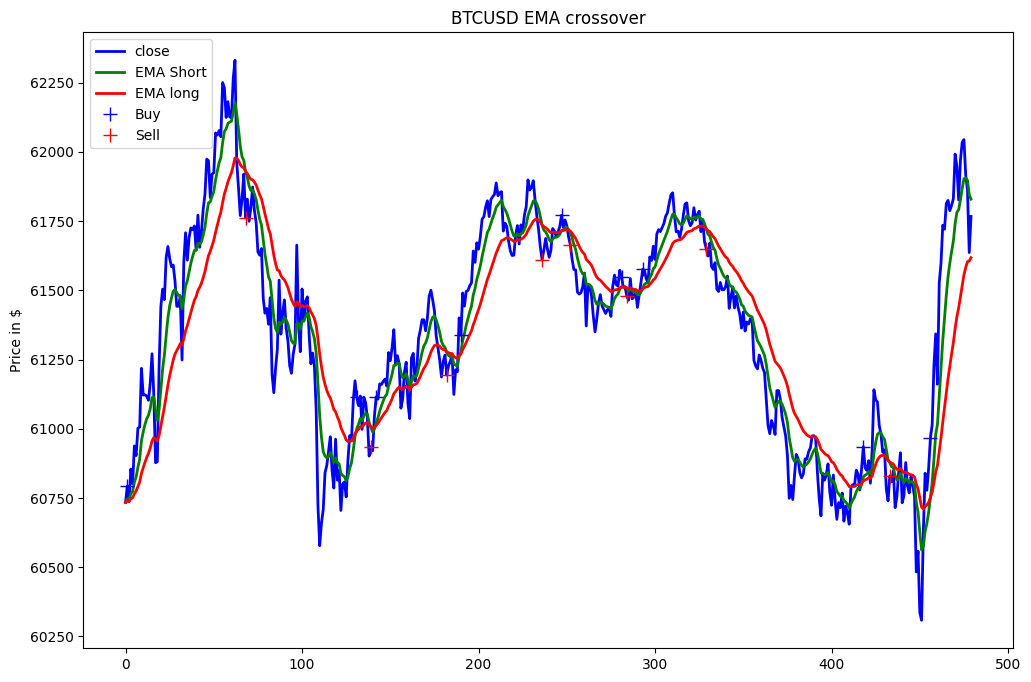

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
axl = fig.add_subplot(111, ylabel = 'Price in $')

btc_df['close'].plot(ax=axl, color='b',lw =2.)
btc_df['ema_short'].plot(ax=axl, color='g',lw =2.)
btc_df['ema_long'].plot(ax=axl, color='r',lw =2.)

axl.plot(btc_df.loc[btc_df.crossover == 1.0].index,
         btc_df.close[btc_df.crossover ==1.0],
         '+', markersize = 10, color = 'b')

axl.plot(btc_df.loc[btc_df.crossover == -1.0].index,
         btc_df.close[btc_df.crossover == -1.0],
         '+', markersize = 10, color = 'r')

plt.legend(['close', 'EMA Short', 'EMA long', 'Buy', 'Sell'])
plt.title('BTCUSD EMA crossover')

In [9]:
from datetime import datetime, timezone, timedelta

# Unix timestamp
unix_time = 1727891296

# Convert to UTC time
utc_time = datetime.fromtimestamp(unix_time, tz=timezone.utc)

# Convert UTC to IST (UTC+5:30)
ist_time = utc_time + timedelta(hours=5, minutes=30)

# Display the result
print("IST Time:", ist_time.strftime('%Y-%m-%d %H:%M:%S'))


IST Time: 2024-10-02 23:18:16


In [12]:
new_t = unix_time-int(365.25*2*24*60*60)
print(new_t)
current_time = datetime.fromtimestamp(new_t, tz = timezone.utc)
ist_time = current_time + timedelta(hours= 5, minutes=30)
print(f"Time :{ist_time.strftime('%Y-%m-%d %H:%M:%S')}")

1664776096
Time :2022-10-03 11:18:16
